# Noise temperature gain - Demo 

noisetemperaturegain.py - model provides the noise temperature and gain of each amplifier in a cascade system, provided that we give the ‘Input signal’ and the output signal from each amplifier for the same input signal. A schematic diagram is illustrated below, 

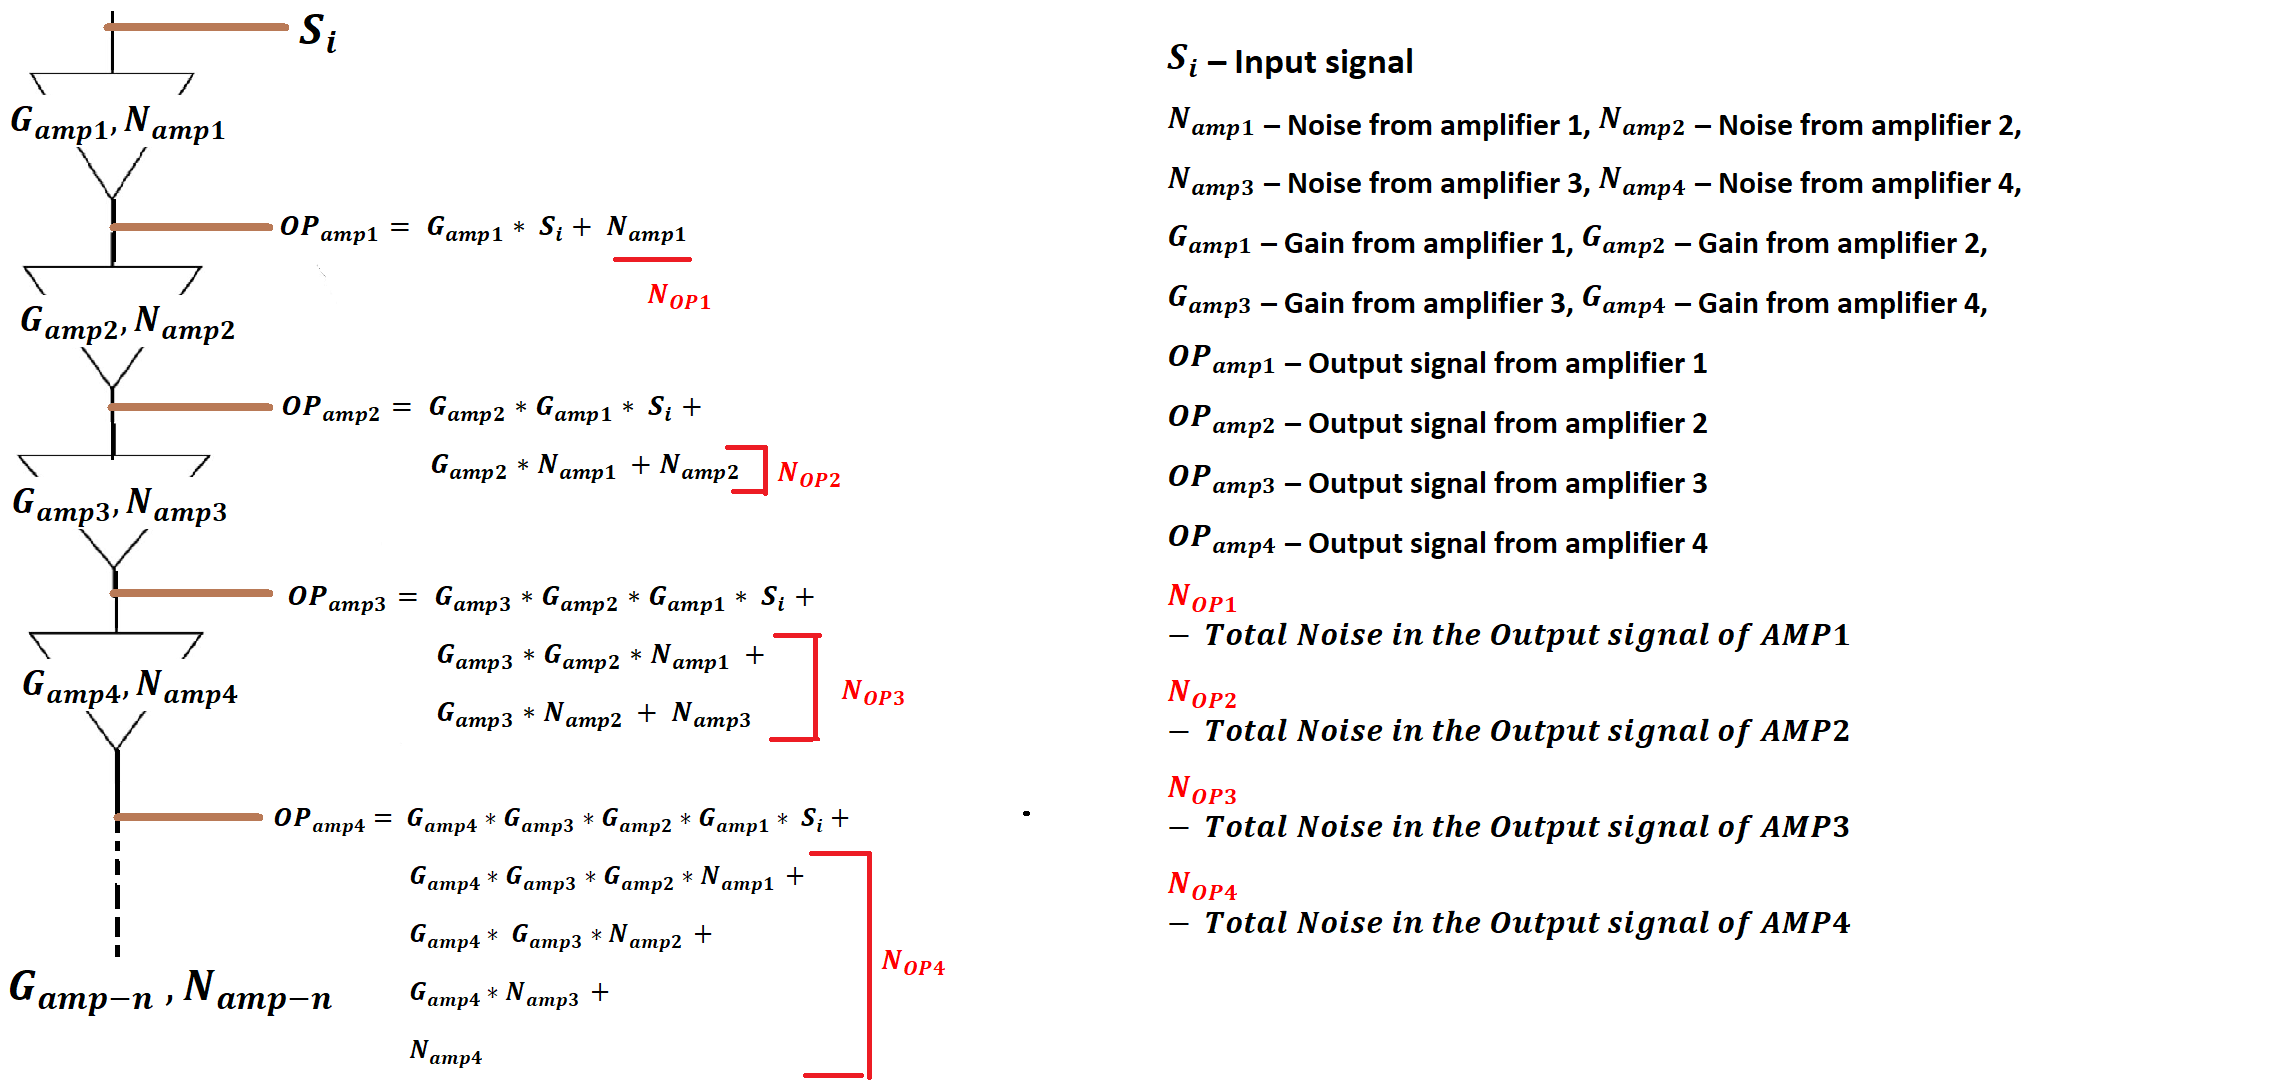
Fig.1

With the help of Fast Fourier transform, we separate the noise and signal from each amplifier. By comparing these the retrieved signals from each amplifier with the previous signal, we can obtain the gain of each amplifier. 
example:
$$Gain from Amplifier-2 = (retrieved  signal  from  OP_{amp2}) / (retrieved  signal from OP_{amp1})$$

After obtain the noise from each amplifier using FFT, we attempt to find the Noise temperature and Noise power of each amplifier. Since the noise accumulated in each amplifier of the cascade system, also contains the noise from the previous amplifiers in the chain, this can be framed as a set of linear equations, as illustrated below for 4 stage amplifier,

$\color{red} N_\color{red}{OP1}$ $ = N_{amp1}$

$\color{red} N_\color{red}{OP2}$ = $G_{amp2} * N_{amp1} + N_{amp2}$

$\color{red} N_\color{red}{OP3}$ = $G_{amp3} *G_{amp2} * N_{amp1} + G_{amp3} *N_{amp2} + N_{amp3}$ 

$\color{red} N_\color{red}{OP4}$ = $G_{amp4}*G_{amp3} *G_{amp2} * N_{amp1} + G_{amp3} *N_{amp2} + G_{amp4} *N_{amp3} + N_{amp4}$  


And solving those linear equations,  we obtain the noise power and noise temperature for each amplifier. 


## Example:

### For a 4 stage amplifier chain

In [1]:
import numpy as np
from noisetemperaturegain import *
from scipy.constants import *

### Inputs:



In [2]:
time = np.linspace(0, 1, 10000)

frequency = 5e9
bandwidth = 1e9
impedance = 50

#input signal
input_signal = np.sin(frequency*2*np.pi*time)



#Generating noise for each amplifier.
actual_temperature_amplifiers = [50, 60, 70, 80]

#Generating noise for each amplifier.
std_noise = []
for i in range(4):
    c = np.sqrt((4*h*frequency*bandwidth*impedance)/(np.exp((h*frequency)/(k*actual_temperature_amplifiers[i]))-1))
    std_noise.append(c)

noise0 = np.random.normal(0, std_noise[0], input_signal.shape)
noise1 = np.random.normal(0, std_noise[1], input_signal.shape)
noise2 = np.random.normal(0, std_noise[2], input_signal.shape)
noise3 = np.random.normal(0, std_noise[3], input_signal.shape)

#Gain each amplifier
gains = [8,6,4,2]


#Total input signal at each amplifier, as illustrated in figure.1
Input_signal_0 = gains[0]*input_signal
Input_signal_1 = gains[0]*gains[1]*input_signal
Input_signal_2 = gains[0]*gains[1]*gains[2]*input_signal
Input_signal_3 = gains[0]*gains[1]*gains[2]*gains[3]*input_signal

#noise at each amplifier, as illustrated in figure.1
tnoise_0 = noise0
tnoise_1 = gains[1]*noise0 + noise1
tnoise_2 = gains[1]*gains[2]*noise0 + gains[2]*noise1 + noise2
tnoise_3 = gains[3]*gains[1]*gains[2]*noise0 + gains[3]*gains[2]*noise1 + gains[3]*noise2 + noise3

#outsignal at each amplifier, as illustrated in figure.1
output_signal_0 = Input_signal_0 + tnoise_0
output_signal_1 = Input_signal_1 + tnoise_1
output_signal_2 = Input_signal_2 + tnoise_2
output_signal_3 = Input_signal_3 + tnoise_3


output_signals = [output_signal_0, output_signal_1, output_signal_2, output_signal_3]

### Execution of noisetemperaturegain.py:

In [3]:
gain_amplifiers, clean_signal, noise, retrieved_noise_amplifiers, noisetemperature_amplifiers, noisepower_amplifiers = noisetemp_gain(input_signal, output_signals, frequency, bandwidth, impedance)

### Results:

In [4]:
for i in range(len(noisetemperature_amplifiers)):
    print('The noise temperature of amplifier', i ,'is', noisetemperature_amplifiers[i])
    print('------------------------------------------------------')
    print('Gain from amplifier', i, 'is', gain_amplifiers[i])
    print('------------------------------------------------------')

The noise temperature of amplifier 0 is 49.617616641743005
------------------------------------------------------
Gain from amplifier 0 is 8.000399956030874
------------------------------------------------------
The noise temperature of amplifier 1 is 60.29322947185404
------------------------------------------------------
Gain from amplifier 1 is 5.9999999801856285
------------------------------------------------------
The noise temperature of amplifier 2 is 68.73201709908066
------------------------------------------------------
Gain from amplifier 2 is 4.000000006316226
------------------------------------------------------
The noise temperature of amplifier 3 is 79.08096703455331
------------------------------------------------------
Gain from amplifier 3 is 2.0000000009325585
------------------------------------------------------
